# Fraud case study



## Day 1: building a fraud model

## Day 2: building an app/dashboard

## Tips success

You will quickly run out of time:

*  Use CRISP-DM workflow to analyze data and build a model
*  Iterate quickly, test often, commit often
*  Build deadlines for your work so you stay on track
*  Should have a model by end of day 1
*  Start app once model is working

### CRISP-DM workflow

Follow the [CRISP-DM](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) steps:

1.  Business understanding
2.  Data understanding
3.  Data preparation
4.  Modeling
5.  Evaluation
6.  Deployment

# Introduction to case study: data & problem

Let's look at the data.  What format is the data in?  How do you extract it?

In [1]:
ls -lh data

total 71888
-rw-r--r--  1 justinlansdale  staff    33M Sep 10 08:54 data.zip
-rw-r--r--  1 justinlansdale  staff   2.1M Sep 10 08:54 subset.json
-rw-r--r--  1 justinlansdale  staff   105K Sep 10 08:54 test_script_examples.csv


Unzip the data so you can load it into Python

In [2]:
!unzip data/data.zip -d data

Archive:  data/data.zip
  inflating: data/data.json          


Initially, work with a subset at first in order to iterate quickly.  But, the file is one giant line of json:

In [3]:
!wc data/data.json

       0 8173151 250481668 data/data.json


Write a quick and dirty script to pull out the first 100 records so we can get code working quickly.

In [4]:
%%writefile subset_json.py
"""head_json.py - extract a couple records from a huge json file.

Syntax: python head_json.py < infile.json > outfile.json
"""

import sys

start_char = '{'
stop_char = '}'
n_records = 100
level_nesting = 0

while n_records != 0:
    ch = sys.stdin.read(1)
    sys.stdout.write(ch)
    if ch == start_char:
        level_nesting += 1
    if ch == stop_char:
        level_nesting -= 1
        if level_nesting == 0:
            n_records -= 1
sys.stdout.write(']')


Overwriting subset_json.py


In [77]:
!python subset_json.py < data/data.json > data/subset.json

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import numpy as np
from bs4.element import Comment
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB

def tf_idf_matrix(documents):
        """
        Sets up a word count matrix, a tfidf matrix, and a CountVectorizer for
        the documents in the directory

        Params
        documents: list of strings to be vectorized

        Returns
        count_matrix: matrix with word counts
        tfidf_matrix: a tfidf matrix of the documents
        cv: CountVectorizer object for the documents
        """
        cv = CountVectorizer()
        count_matrix = cv.fit_transform(documents)
        tfidf_transformer = TfidfTransformer()
        tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)
        return count_matrix, tfidf_matrix, cv

def naive_bayes_model(self):
    """
    Sets up a naive bayes model for the documents in the directory

    Params
    directory: directory for the documents
    stop_words: list of stop_words for word filtration
    technique: technique: str choose from ['porter', 'snowball','wordnet']

    Returns
    nb_model: a naive bayes model for the documents in the directory
    cv: CountVectorizer object for the documents
    """
    self.nb_model = MultinomialNB()
    self.nb_model.fit(self.tfidf_matrix, self.train_targets)

In [83]:
import pandas as pd

df = pd.read_json('data/data.json')

In [84]:
print(df.describe())

       approx_payout_date   body_length      channels  delivery_method  \
count        1.433700e+04  14337.000000  14337.000000     14321.000000   
mean         1.350933e+09   3672.521936      6.176676         0.439564   
std          2.401300e+07   5758.113003      3.860333         0.591487   
min          1.171256e+09      0.000000      0.000000         0.000000   
25%          1.334221e+09    750.000000      5.000000         0.000000   
50%          1.355805e+09   1990.000000      6.000000         0.000000   
75%          1.370646e+09   4280.000000      8.000000         1.000000   
max          1.523488e+09  65535.000000     13.000000         3.000000   

       event_created     event_end  event_published   event_start  \
count   1.433700e+04  1.433700e+04     1.423800e+04  1.433700e+04   
mean    1.345825e+09  1.350501e+09     1.340854e+09  1.350205e+09   
std     2.404107e+07  2.401299e+07     8.750386e+07  2.398787e+07   
min     1.170332e+09  1.170824e+09     0.000000e+00  1.17

In [85]:
df.head().T

,0,1,2,3,4
acct_type,fraudster_event,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800
body_length,3852,3499,2601,12347,2417
channels,5,0,8,6,11
country,US,US,US,IE,US
currency,USD,USD,USD,EUR,USD
delivery_method,0,1,1,1,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666


Some of the data is text (and HTML), which will require feature engineering:

* TF-IDF
* Feature hashing
* n-grams

etc.

You will also need to construct a target from `acct_type`.  Fraud events start with `fraud`.  How you define fraud depends on how you define the business problem.

In [86]:
df.acct_type.value_counts(dropna=False)

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

Is missing data a problem?  What are your options for handling missing data?

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approx_payout_date,14337.0,1.350933e+09,2.401300e+07,1.171256e+09,1.334221e+09,1.355805e+09,1.370646e+09,1.523488e+09
body_length,14337.0,3.672522e+03,5.758113e+03,0.000000e+00,7.500000e+02,1.990000e+03,4.280000e+03,6.553500e+04
channels,14337.0,6.176676e+00,3.860333e+00,0.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.300000e+01
delivery_method,14321.0,4.395643e-01,5.914866e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
event_created,14337.0,1.345825e+09,2.404107e+07,1.170332e+09,1.329754e+09,1.351043e+09,1.365346e+09,1.382012e+09
event_end,14337.0,1.350501e+09,2.401299e+07,1.170824e+09,1.333789e+09,1.355373e+09,1.370214e+09,1.523056e+09
event_published,14238.0,1.340854e+09,8.750386e+07,0.000000e+00,1.329499e+09,1.351099e+09,1.365478e+09,1.381608e+09
event_start,14337.0,1.350205e+09,2.398787e+07,1.170819e+09,1.333406e+09,1.355000e+09,1.370048e+09,1.418850e+09
fb_published,14337.0,1.274325e-01,3.334685e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gts,14337.0,2.430231e+03,9.142308e+03,0.000000e+00,1.164100e+02,4.319300e+02,1.547260e+03,3.062939e+05


In [89]:
import numpy as np
df['fraud'] = np.where((df['acct_type'] == 'fraudster') | (df['acct_type'] == 'fraudster_event') | (df['acct_type'] == 'fraudster_att'), 1, 0)

In [90]:
df['org_fb_twitter'] = df['org_facebook'] + df['org_twitter']

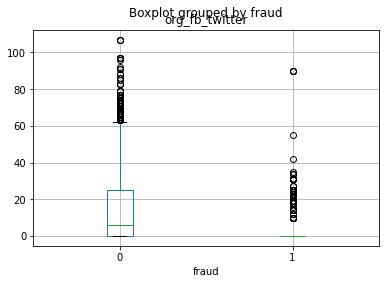

In [91]:
df.boxplot('org_fb_twitter', 'fraud')

In [92]:
boxes = ['delivery_method', 'has_logo', 'name_length', 'org_facebook', 'org_twitter', 'user_age']

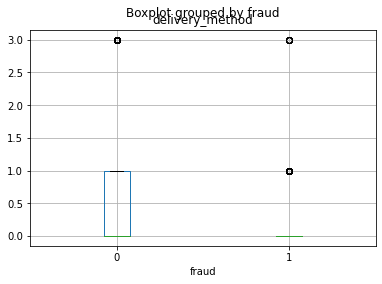

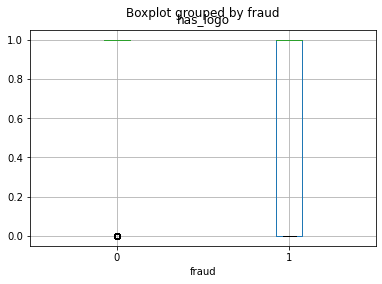

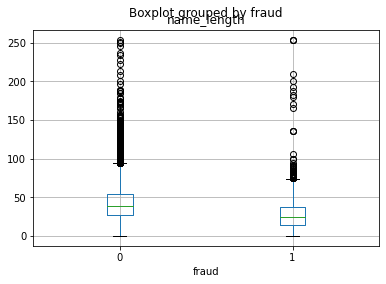

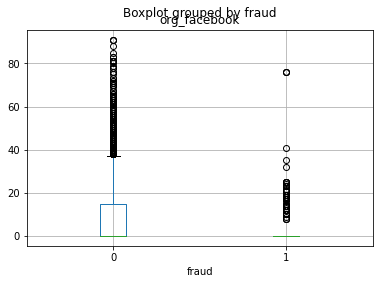

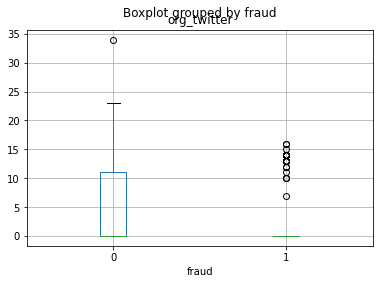

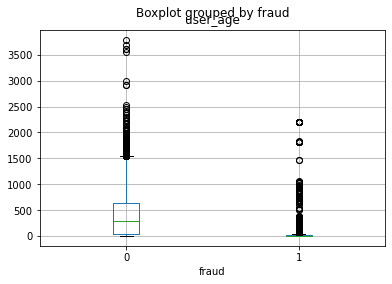

In [93]:
for box in boxes:
    df.boxplot(box, 'fraud')

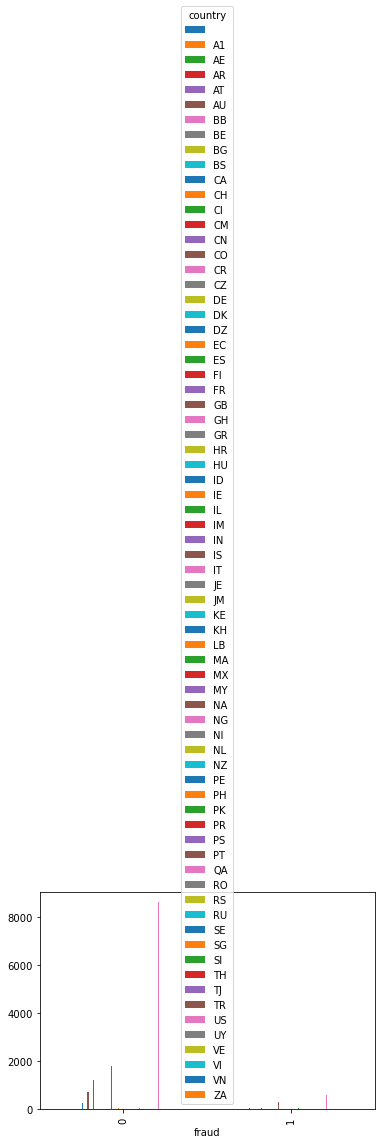

In [94]:
df.groupby(['country','fraud'])['fraud'].count().unstack(0).plot.bar()

In [95]:
df.ticket_types[0]
#ticket_types = list?

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

drop_list = ['acct_type', 'approx_payout_date', 'event_end', 'event_start', 'gts', 'num_payouts', 'payout_type', 'sale_duration', 'sale_duration2', 'ticket_types']
df_for_models = df.drop(drop_list, axis=1)
df_for_models.dropna(inplace=True)

In [97]:
y = df_for_models.pop('fraud').values
X = df_for_models._get_numeric_data().values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.predict_proba(X_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.96, 0.04],
       [0.34, 0.66],
       [0.95, 0.05]])

In [99]:
from sklearn.metrics import f1_score
f1_score(y_test, rf.predict(X_test))

0.6256410256410256

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [101]:
rand_list = np.random.randint(0, len(df), 10)
rand_list

array([ 5076, 10533,  3052,  8517,  8280,  6928,   107,   407, 12770,
        7915])

In [102]:
test_examples_df = df.loc[rand_list]

In [103]:
test_examples_df.to_csv('data/test_script_examples.csv')

In [104]:
print(df.acct_type.unique())

['fraudster_event' 'premium' 'spammer_warn' 'fraudster' 'spammer_limited'
 'spammer_noinvite' 'locked' 'tos_lock' 'tos_warn' 'fraudster_att'
 'spammer_web' 'spammer']


In [105]:
from bs4 import BeautifulSoup
from bs4.element import Comment



def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

In [149]:
descriptions = df.description
df['fraud'] = np.where((df['acct_type'] == 'fraudster') | 
                      (df['acct_type'] == 'fraudster_event') |
                      (df['acct_type'] == 'fraudster_att'), 1, 0)

In [150]:
df['desc_text'] = 0
# print(df.info())
for i in range(df.shape[0]):
    df.iloc[i,46] = text_from_html(descriptions[i])



In [151]:
print(df['fraud'][:2])

0     Party Starz Entertaintment & Diverse Internat...
1    Join us for a quick, one-night, community-buil...
Name: fraud, dtype: object


In [152]:
naive_bayes_df = df[['fraud', 'desc_text']]
print(naive_bayes_df.head())

# count_matrix, tfidf_matrix, cv = tf_idf_matrix(df['desc_text'])
# print(count_matrix)

                                               fraud  desc_text
0   Party Starz Entertaintment & Diverse Internat...          0
1  Join us for a quick, one-night, community-buil...          0
2  Teacher Training on the Desired Results Develo...          0
3  Affiliations are now due in respect of the 201...          0
4  Writers and filmmakers need to understand thei...          0


In [153]:
class NaiveBayes():

    def __init__(self, df):
        self.df = df
        self.train_cv = None
        self.train_count_matrix = None
        self.train_tfidf_matrix = None
        self.nb_model = None

    def generate_train_test(self, train_size=0.75):
        self.y = self.df.pop('fraud').values
        self.X = self.df['desc_text'].values
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                                                                self.X, self.y, 
                                                                stratify=self.y, 
                                                                train_size=train_size)

    def tf_idf_matrix(self):
            """
            Sets up a word count matrix, a tfidf matrix, and a CountVectorizer for
            the documents in the directory

            Params
            documents: list of strings to be vectorized

            Returns
            count_matrix: matrix with word counts
            tfidf_matrix: a tfidf matrix of the documents
            cv: CountVectorizer object for the documents
            """
            self.train_cv = CountVectorizer(lowercase=True, stop_words='english',)
            self.train_count_matrix = cv.fit_transform(self.X_train)
            tfidf_transformer = TfidfTransformer()
            self.train_tfidf_matrix = tfidf_transformer.fit_transform(self.train_count_matrix)

    def naive_bayes_model(self):
            """
            Sets up a naive bayes model for the documents in the directory

            Params
            directory: directory for the documents
            stop_words: list of stop_words for word filtration
            technique: technique: str choose from ['porter', 'snowball','wordnet']

            Returns
            nb_model: a naive bayes model for the documents in the directory
            cv: CountVectorizer object for the documents
            """
            self.nb_model = MultinomialNB()
            self.nb_model.fit(self.train_tfidf_matrix, self.y_train)

    def return_top_n_words(n=7):
            """
            Prints out the top n words for each document in the categories for the 
            documents in the directory

            Params
            directory: directory for the documents
            stop_words: list of stop_words for word filtration
            documents: a list of the categories (folders) in the directory
            technique: technique: str choose from ['porter', 'snowball','wordnet']

            """
            feature_words = cv.get_feature_names()
            categories = self.nb_model.classes_
            self.top_words_dic = {}
            for cat in range(len(categories)):
                print(f"\n Target: {cat}, name: {categories[cat]}")
                log_prob = self.nb_model.feature_log_prob_[cat]
                i_topn = np.argsort(log_prob)[::-1][:n]
                features_topn = [feature_words[i] for i in i_topn]
                self.top_words_dic[categories[cat]] = features_topn
                print(f"Top {n} tokens: ", features_topn)

In [154]:
nb = NaiveBayes(df)
nb.generate_train_test()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [143]:
test_counts_fraud = [x for x in nb.y_test if x == 1]
test_counts_notfraud = [x for x in nb.y_test if x == 0]
train_counts_fraud = [x for x in nb.y_train if x == 1]
train_counts_notfraud = [x for x in nb.y_train if x == 0]

In [144]:
print(len(test_counts_fraud)/len(test_counts_notfraud))
print(len(train_counts_fraud)/len(train_counts_notfraud))

0.09901900674432863
0.09916172561848292


In [146]:
nb.naive_bayes_model()

TypeError: naive_bayes_model() missing 1 required positional argument: 'tfidf_matrix'